# Predicting Heart Disease Using Machine Learning

This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We are going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have a heart disease?

## 2. Data

The original data came from the cleveland database from the [UCI Machine Learning Repository.](https://archive.ics.uci.edu/ml/datasets/heart+disease)

There is also a version of it available on [Kaggle](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci/discussion).

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features.

Below is the little information about each of the features in our data. 

**Create data dictionary**

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    - Value 0: typical angina
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * Value 0: upsloping
    * Value 1: flat
    * Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. and the target: condition: 0 = no disease, 1 = disease

## Preparing the tools

We are going to use pandas, matplotlib and Numpy for data analysis and manipulation

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [2]:
df = pd.read_csv('data/heart-disease.csv')
df.shape

(303, 14)

Our data currently has 303 rows and 14 columns

## Data Exploration

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What is missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of our data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


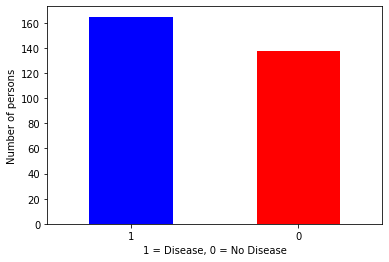

In [5]:
# Let's find out how many of each class of targets there are
df['target'].value_counts().plot(kind='bar', color=['blue','red'])
plt.xlabel('1 = Disease, 0 = No Disease')
plt.ylabel('Number of persons')
plt.xticks(rotation=0);

This is a relatively balanced problem, meaning we have quite a similar amount of examples in both classes.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Above shows there are no missing value. 

In [8]:
# More statistical information about our data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

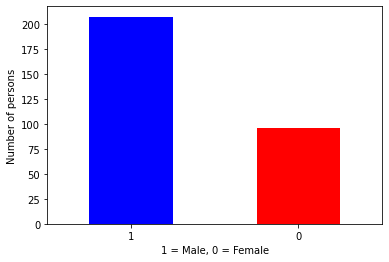

In [9]:
df.sex.value_counts().plot(kind='bar', color=['blue','red'])
plt.xlabel('1 = Male, 0 = Female')
plt.ylabel('Number of persons')
plt.xticks(rotation=0);

In [10]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


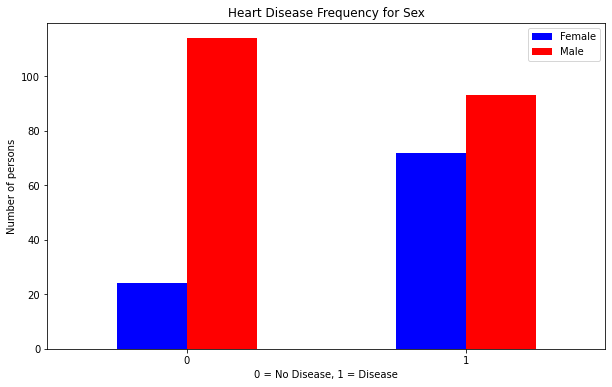

In [11]:
# Create a chart of the crosstab above
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize = (10,6),
                                    color = ['blue','red']);
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Number of persons')
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

Based on our data, a higher proportion of female had heart disease compared to male.

### Age vs. Max Heart Rate for Heart Disease

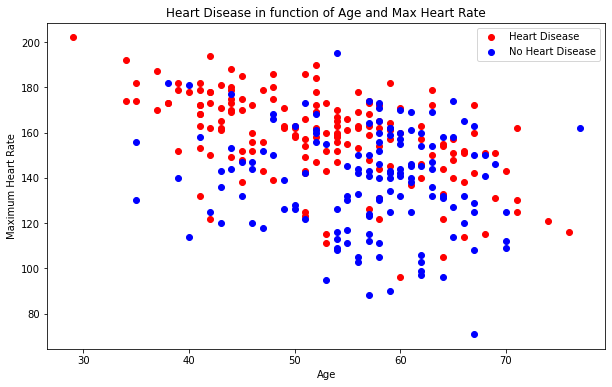

In [12]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples, taking specified column where the target is true
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='red');

# Scatter with negative examples, taking specified column where the target is true
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='blue')

# Add some helpful information to our chart
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(['Heart Disease','No Heart Disease'])
plt.title('Heart Disease in function of Age and Max Heart Rate');

As someone gets older, there maximum heart rate decreases. Apart from that, there is not much to tell in relation to heart disease or not from above.

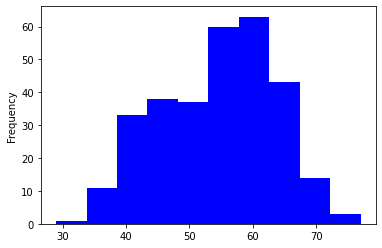

In [13]:
# Check the distribution of the age with a histogram
df.age.plot.hist(color='blue');

Above histogram shows a normal distribution, although a bit skewed to the right, showing that we have a higher number of our population within the range of 55 - 65, and generally within the range of 40 - 65.

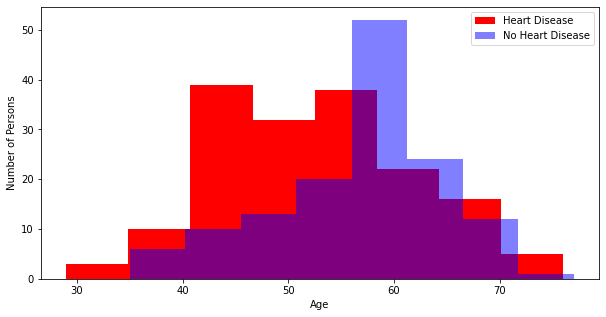

In [14]:
# Check the distribution of age by target
# Create another figure
plt.figure(figsize=(10,5))

# Scatter with positive examples, taking specified column where the target is true
plt.hist(df.age[df.target==1],bins=8,color='red')
plt.hist(df.age[df.target==0],bins=8,color='blue',alpha=0.5)
plt.legend(['Heart Disease','No Heart Disease'])
plt.xlabel('Age')
plt.ylabel('Number of Persons');

## Heart Disease Frequency per Chest Pain Type

cp: chest pain type
- Value 0: typical angina: chest pain related decrease blood supply to the heart
- Value 1: atypical angina: chest pain not related to heart
- Value 2: non-anginal pain: typically esophageal spasms (non heart related)
- Value 3: asymptomatic: chest pain not showing signs of disease

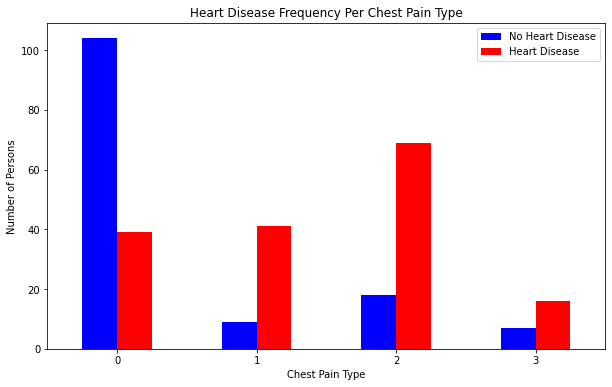

In [15]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                    figsize = (10,6),
                                    color = ['blue','red'])
plt.legend(['No Heart Disease','Heart Disease'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Persons')
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xticks(rotation=0);

It seems that as CP goes up, the target value also increases. We will look at correlation of all our independent variables and dependent variable below.

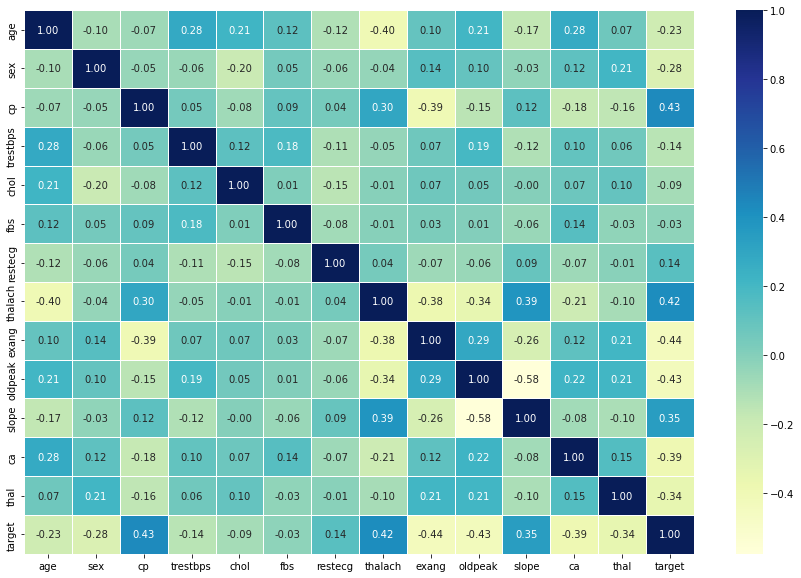

In [16]:
# Make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu');

From above, and in relation to our target, `chest pain (cp)`, `maximum heart rate achieved (thalach)`, and `slope` has the most **positive correlation**, while `exercise induced angine (exang)`, `ST depression induced by exercise (oldpeak)`, `number of major vessels (ca)` and `thalium stress result (thal)` has the most **negative correlation** to our target in that order.

## 5. Modelling

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# Split data into X and y
X = df.drop('target', axis = 1)

y = df['target']

In [19]:
X.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [20]:
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: target, dtype: int64

In [21]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [22]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [23]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now, we have our train data split with 242 observations.

In [24]:
len(X_test), len(y_test)

(61, 61)

And we have 61 observations for our test data, which we would introduce later on, after we have trained our model on the training data, to see how accurate our prediction would be on data it has never seen before when evaluating.

Now that we have our data split into training and test set, it is time to build a machine learning model.

We'll train it (find the patterns) on the training set, and we will test it (use the patterns on the test set).

This is a classification problem, so we will be experimenting with different classification models, which we already imported earlier. So for now, we will start with 3:
- Logistic Regression
- K-Nearest Neighbours Classifier
- Random Forest Classifier

In [25]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    '''
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [26]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

/Users/tosinakingbemisilu/Desktop/ds_project/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

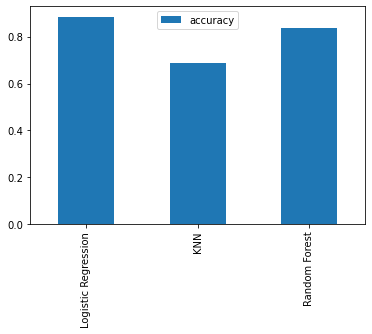

In [27]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Now we have our baseline model and even though looks a bit good, we know our first predictions aren't what we would base our next steps off, so we will experiment with them further by tuning the hyperparameters. In a nutshell, we look at the following next:

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning (by hand)

In [28]:
# tuning KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

We visualize the above

Maximum KNN score on the test data: 75.41%


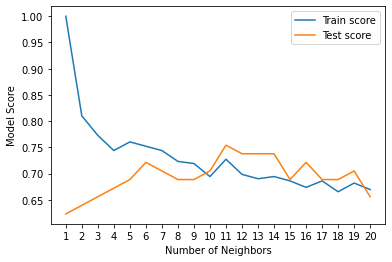

In [31]:
# Visualize based on our hyperparameter tuning
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

Since our logistic regression and random classifier still performs better even with the tuning of the KNN, we would drop KNN and focus on tuning the others.

## Hyperparameter tuning with RandomizedSearchCV

We are going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [32]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5 , 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

Now we have our hyperparameter grids setup for each of our models, we go ahead to tune them using RandomizedSearchCV

In [33]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
# Check the best parameter
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [35]:
# Check our best logistic regression parameter score on the test data
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Same as what we got with the default hyperparameters. Let's do the same tuning for RandomForestClassifier().

In [36]:
# Tune RandomForestClassifier()

np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
# Find the best parameters for our randomforestclassifier()
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [38]:
# Evaluate our best random forest classifier parameter on the test data
rs_rf.score(X_test, y_test)

0.8688524590163934

Just a little bit better than our default, but still lower than the logistic regression model.

In [39]:
# Previous default model scores
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV.

In [40]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
np.random.seed(42)

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
# check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

Even with the introduction of the GridSearchCV and increase in the number of our Logistic Regression hyperparameters to 30 candidates, we still got the same score for our logistic regression model (88.5%).

# Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, we would need to make predictions first and we will assign that to `y_preds`.

In [43]:
# Make Predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

/Users/tosinakingbemisilu/Desktop/ds_project/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


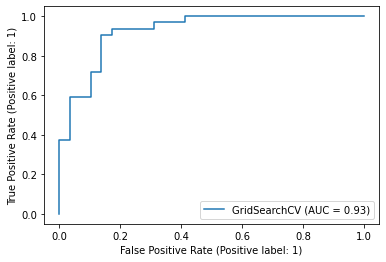

In [44]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

Looking at the error above, we would go ahead to try out the new class methods

In [45]:
# Import RocCurveDisplay from sklearn.metrics
from sklearn.metrics import RocCurveDisplay

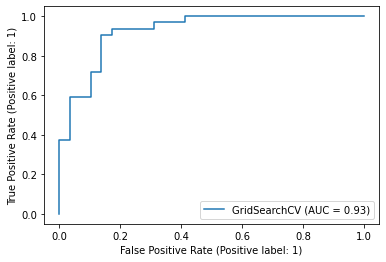

In [46]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

Ok! We would leave the above just for future reference. So far, we have an AUC of 0.93, which is fair. Let's go ahead to plot our confusion matrix using seaborn for a better visualization, since our scikit learn `confusion_matrix` would not give us a perfect view as shown below.

In [47]:
# Using scikit-learn confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


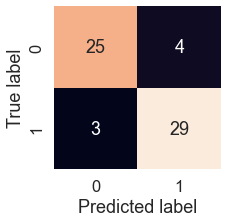

In [48]:
# Revamping our confusion matrix with seaborn
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    '''
    Plots a confusion matrix using Seaborn's heatmap().
    '''
    
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     # Annotate the boxes
                     annot=True,
                     cbar=False)
    plt.xlabel('Predicted label') # model predictions go on the x-axis
    plt.ylabel('True label') # true labels go on the y-axis
    
plot_conf_mat(y_test, y_preds)

So, our model gave us a type 1 error (false positive) of 4 and a type 2 error (false negative) of 3.

Now we have a ROC curve, an AUC metric and a confusion matrix, we will go ahead a classification report as well as cross-validated precision, recal and f1 score.

In [49]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



We have only calculated the metrics above on only one train-test split. We would however recalculate this metrics using cross-validation to make it more robust.

## Calculate evaluation metrics using cross-validation

We are going to calcuate precision, recall and f1-score of our model using cross validation, and to do so, we will be using `cross_val_score()`.

In [50]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [51]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

In [54]:
# define our evaluation function for 5 cv predictions

def evaluate_5_cv_preds(estimator, X, y):
    """
    Performs accuracy, precision, recall and F1 evaluation comparison on X and y with cv of 5 and returns a chart.
    estimator = defined estimator
    X = features
    y = label
    """
    from sklearn.model_selection import cross_val_score
    
    # Cross-validate accuracy
    cv_acc = cross_val_score(estimator,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')

    # Take the mean accuracy of our cross-validation
    cv_acc = cv_acc.mean()
    
    # Cross-validated precision
    cv_precision = cross_val_score(estimator,
                               X,
                               y,
                               cv=5,
                               scoring='precision')

    # Take the mean precision of our cross-validation
    cv_precision = cv_precision.mean()
    
    # Cross-validated recall
    cv_recall = cross_val_score(estimator,
                            X,
                            y,
                            cv=5,
                            scoring='recall')

    # Take the mean precision of our cross-validation
    cv_recall = cv_recall.mean()
    
    # Cross-validated f1-score
    cv_f1 = cross_val_score(estimator,
                             X,
                             y,
                             cv=5,
                             scoring='f1')

    # Take the mean precision of our cross-validation
    cv_f1 = cv_f1.mean()
    
    # Visualize our cross-validated metrics
    cv_metrics = {'Accuracy': cv_acc,
                  'Precision': cv_precision,
                  'Recall': cv_recall,
                  'F1-score': cv_f1}
    
    print(pd.DataFrame(cv_metrics, index=[0]))
    
    # function to add value labels
    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i,y[i],y[i],ha = 'center', backgroundcolor = 'red', fontsize = 'medium')
    
    # Plotting our chart with labels
    import matplotlib.pyplot as plt
    x = list(cv_metrics.keys())
    y = np.around(list(cv_metrics.values()),2)
    fig, ax = plt.subplots(figsize=(7,5))
    ax.bar(x, y)
    addlabels(x, y)
    ax.set(ylabel='Score')

   Accuracy  Precision    Recall  F1-score
0  0.844699   0.820794  0.921212  0.867301


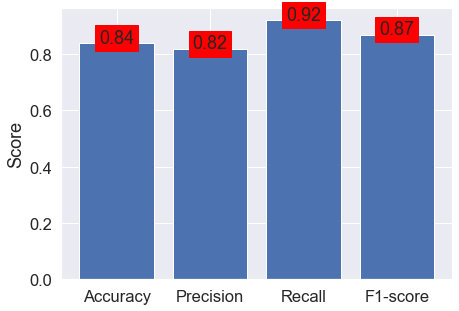

In [55]:
evaluate_5_cv_preds(clf, X, y)

### Feature Importance

Feature importance will help us to find out which feature contributed mostly to the outcome of the model and how they contributed.

Finding feature importance is different for each machine learning model. We will therefore go ahead to find the feature importance for our LogisticRegression model.

In [56]:
# Fit an instance of LogisticRegression using our best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

clf.fit(X_train, y_train);

In [57]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044662,  0.66067038, -0.01156993, -0.00166374,
         0.04386106,  0.31275853,  0.02459361, -0.60413087, -0.56862799,
         0.4505163 , -0.63609901, -0.67663377]])

In [58]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672816664025417,
 'sex': -0.8604466164764594,
 'cp': 0.660670378971457,
 'trestbps': -0.011569931858994414,
 'chol': -0.0016637446649201797,
 'fbs': 0.04386106245399992,
 'restecg': 0.31275852888688666,
 'thalach': 0.024593614591211826,
 'exang': -0.6041308666006405,
 'oldpeak': -0.5686279913648149,
 'slope': 0.45051630416484045,
 'ca': -0.636099010407402,
 'thal': -0.6766337677461476}

Above shows how much each of our features contributes to the target variable using the result from our model. Let's go ahead to visualize this.

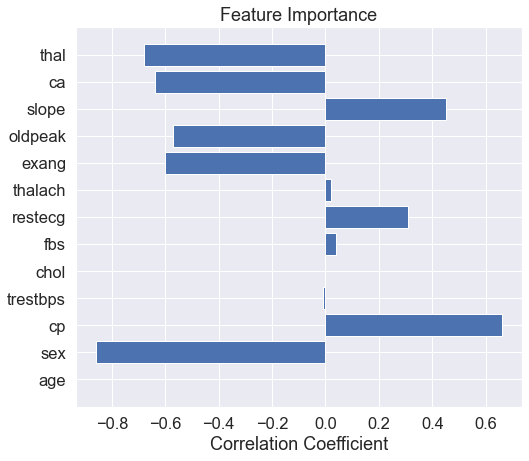

In [77]:
# Visualize feature importance
#feature_df = pd.DataFrame(feature_dict, index=[0])
#feature_df.T.plot.bar(title='Feature Importance', legend = False);

fig, ax = plt.subplots(figsize=(8,7))
ax.barh(list(feature_dict.keys()), np.around(list(feature_dict.values()),2))
ax.set(xlabel='Correlation Coefficient', title='Feature Importance');

### Next Step

We still have not been able to get up to our expected 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept. However, as next steps, we could:
* keep experimenting with the parameters in our Logistic Regression, which so far has the highest accuracy score
* try out other classification models we have not tried already, to see if we can get better performance.
* Reduce some of the features to see if we can get better result
* collect more data